# Introduction to Data Science
## Homework 3

Student Name: Connor Concannon

Student Netid: cmc1204
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

No idea how to do this.  Grade accordingly!

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the target variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [117]:
import pandas as pd
import numpy as np
df = pd.read_csv('cell2cell_data.csv',
                 names = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes',
                          'travel','pcown','credidtcd','retcalls','churndep'])
df.head()

rnd = np.random.random_sample(len(df))<.8
rnd

train_df = df[rnd]
test_df = df[~rnd]
train_df.describe().transpose()

train_y = train_df['churndep']
train_df = train_df.drop('churndep',axis=1)
train_df.head()


test_y = test_df['churndep']
test_df = test_df.drop('churndep',axis=1)

train_df.shape


(31976, 11)

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

I would run a set of bivariate analyses (t tests, anova, etc) so show that the values do not differ between the sample.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [119]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='entropy')#,random_state=100,    max_depth=3,min_samples_leaf=5
clf.fit(train_df,train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

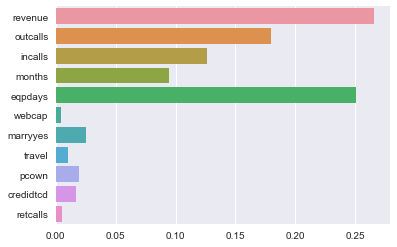

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

i = dict(zip(train_df.columns.values, clf.feature_importances_))
i
sns.barplot(clf.feature_importances_,train_df.columns.values)


5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

The relationship between the top 3 features is positive.
Because we set the decision tree criteria as 'entropy', the feature importance values are also measuring 'information gain'.
The top three drivers of churn are previous revenue, equipment days, and number of outcalls.  These make sense.
Customers with numerous house calls may be unsatisfied with their service and at risk of churning.




6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? If they are different, can you explain the difference?

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_pred = clf.predict(train_df)
cm = accuracy_score(train_y,train_pred)
cm
#.99

test_pred = clf.predict(test_df)
cm = accuracy_score(test_y,test_pred)
cm
#.52

0.53291893949004188


The accuracy on the training data is nearly perfect - 0.99.  This is because I have 'overfit' the model. 
I have essentially memorized the data, which is not good.
Using the model to predict unseen test cases results is much more realistic performance - 0.52.

### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [5]:
import numpy as np
# Code here

min_samples_split_values = np.arange(10,110,10)
min_samples_leaf_values = np.arange(10,110,10)

min_samples_split_values,min_samples_leaf_values

(array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

2\. Explain in words your reasoning for choosing the above ranges.

The minimum number of samples required for a split is 2.  
It seemed logical to test a sequence of values that are greater than 2.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [122]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

%matplotlib inline


rng1 = np.arange(3000,5000,250)
rng2 = np.arange(2,100,10)
best_score=0

param_grid = {'min_samples_split': rng1,
              'min_samples_leaf': rng2}

param_grid
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid,cv=2)
grid_search.fit(train_df,train_y)


GridSearchCV(cv=2, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750]), 'min_samples_leaf': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

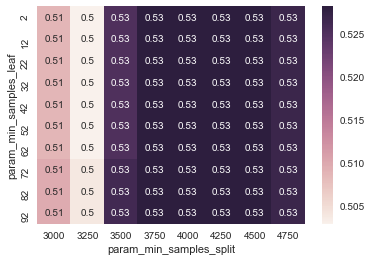

In [123]:
r= pd.DataFrame(grid_search.cv_results_)


r = r.melt(id_vars=['param_min_samples_leaf','param_min_samples_split'])
r = pd.DataFrame(r.query('variable=="mean_test_score"'))
r.drop(r.columns[[2]],axis=1,inplace=True)
r = r.pivot(index="param_min_samples_leaf",columns="param_min_samples_split",values="value")
r = r[r.columns].astype(float)


sns.heatmap(r,annot=True)


4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

After trying many different parameter grids,
the best accuracy I could achieve is abouut .53, using about 3500 min_samples_split
and 2 min_samples_leaf.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

I would use the predicted probabilities (of churn) generated by this model to target customers with enticements, discounts, special offers, etc. to encourage them NOT to churn.  I would target those most at risk of churning (probability >.75) with these offers.  Conversely, I would ignore those with low probabilities of churn (probability <.25) since they seem unlikely to churn anyway. Even if this initial model is not that great in terms of performance, it may do a good job at prioritizing resources over the baseline.